In [1]:
import pandas as pd
import geopandas
import os
import matplotlib.pyplot as plt

print(os.listdir("."))
print()
print('\n'.join(os.listdir('Edinburgh/scotland-latest-free.shp')))

['.git', '.gitignore', '.ipynb_checkpoints', 'cache', 'corcondia.py', 'df_Edinburgh.pkl', 'df_routes.pkl', 'df_stations.csv', 'Edinburgh', 'example.png', 'Factors', 'factor_trips.csv', 'Get_bike_data.ipynb', 'Get_OSM_Data.ipynb', 'Initial_Exploration.ipynb', 'Parallel_Factor_plot.ipynb', 'README.md', 'Tensor_factorization.ipynb', '__pycache__']

gis_osm_buildings_a_free_1.shp
gis_osm_buildings_a_free_1.shx
gis_osm_landuse_a_free_1.shp
gis_osm_landuse_a_free_1.shx
gis_osm_railways_free_1.shp
gis_osm_railways_free_1.shx
gis_osm_roads_free_1.cpg
gis_osm_roads_free_1.dbf
gis_osm_roads_free_1.prj
gis_osm_roads_free_1.shp
gis_osm_roads_free_1.shx
gis_osm_transport_a_free_1.shp
gis_osm_transport_a_free_1.shx
gis_osm_transport_free_1.shp
gis_osm_transport_free_1.shx
gis_osm_waterways_free_1.shp
gis_osm_waterways_free_1.shx
gis_osm_water_a_free_1.shp
gis_osm_water_a_free_1.shx
README


In [2]:
# Get Edinburgh's historical traffic data from: https://edinburghcyclehire.com/open-data/historical
df = pd.read_csv("Edinburgh/bike_trips/df_bike_trips.csv")

# Get Edinburgh's shapefile from: http://download.geofabrik.de/europe/great-britain/scotland.html
# pdf manual of the file: http://download.geofabrik.de/osm-data-in-gis-formats-free.pdf

df_roads = geopandas.read_file('Edinburgh/scotland-latest-free.shp/gis_osm_roads_free_1.shp')

KeyboardInterrupt: 

In [108]:
df_roads['coords'] = df_roads.geometry.apply(lambda x:x.coords)

df_roads['min_lon'] = df_roads.coords.apply(lambda x : min(e[0] for e in x))
df_roads['max_lon'] = df_roads.coords.apply(lambda x : max(e[0] for e in x))
df_roads['min_lat'] = df_roads.coords.apply(lambda x : min(e[1] for e in x))
df_roads['max_lat'] = df_roads.coords.apply(lambda x : max(e[1] for e in x))

df_roads.min_lon.min(), df_roads.max_lon.max(), df_roads.min_lat.min(), df_roads.max_lat.max()

In [146]:
Ed_lat = (55.8751, 56.0034)
Ed_lon = (-3.45, -3.05)

Ed_min_lat = min(Ed_lat)
Ed_max_lat = max(Ed_lat)
Ed_min_lon = min(Ed_lon)
Ed_max_lon = max(Ed_lon)

filter_1 = df_roads.min_lat >= Ed_min_lat
filter_2 = df_roads.max_lat <= Ed_max_lat
filter_3 = df_roads.min_lon >= Ed_min_lon
filter_4 = df_roads.max_lon <= Ed_max_lon

lat_filter = filter_1 & filter_2
lon_filter = filter_3 & filter_4

filter_1.sum(), filter_2.sum(), filter_3.sum(), filter_4.sum()

df_Edinburgh = df_roads[lat_filter&lon_filter]

<AxesSubplot:xlabel='end_station_longitude', ylabel='end_station_latitude'>

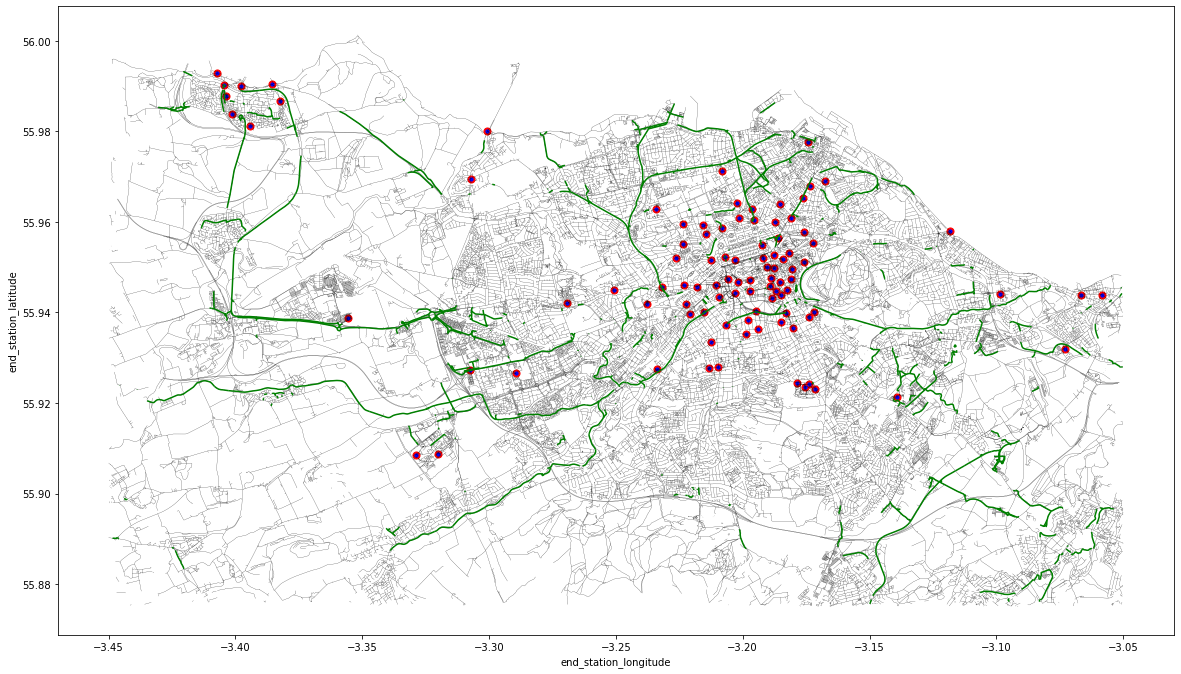

In [167]:
fig, ax = plt.subplots(figsize=(20,20))
df_Edinburgh.plot(ax=ax, lw=.2, edgecolor='k')
df_Edinburgh[df_Edinburgh.fclass=='cycleway'].plot(color='g', ax=ax)
df.drop_duplicates(subset='start_station_id')[['start_station_latitude','start_station_longitude' ]].plot.scatter(y='start_station_latitude',
                                                                                                                  x='start_station_longitude',
                                                                                                                  ax=ax,
                                                                                                                  color='r',
                                                                                                                  s=50)
df.drop_duplicates(subset='end_station_id')[['end_station_latitude','end_station_longitude' ]].plot.scatter(y='end_station_latitude',
                                                                                                            x='end_station_longitude',
                                                                                                            ax=ax,
                                                                                                            color='blue',
                                                                                                            s=10)

In [148]:
df_Edinburgh.to_pickle('df_Edinburgh.pkl')

In [ ]:
# to do: get the same information from OSM API, with the cycle lanes !
# https://wiki.openstreetmap.org/wiki/FR:Bicycle#Pistes_cyclables
# https://www.cyclestreets.net/help/journey/osmconversion/
# https://wiki.openstreetmap.org/wiki/Key:cycleway